In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!ls "/content/drive/My Drive/GWDATASET"

dataset  dataset.zip  n_dataset  n_dataset.zip


In [ ]:
!unzip '/content/drive/My Drive/GWDATASET/dataset.zip' -d '/content/drive/My Drive/GWDATASET/'

In [ ]:
import os
len(os.listdir('/content/drive/My Drive/GWDATASET/dataset/class_1'))

In [1]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt

(128, 128, 3)


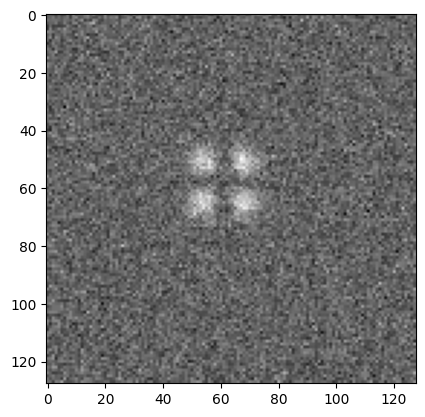

In [ ]:
m_class_0_file_names = os.listdir('/content/drive/My Drive/GWDATASET/dataset/class_0')
m_class_1_file_names = os.listdir('/content/drive/My Drive/GWDATASET/dataset/class_1')
m_class_2_file_names = os.listdir('/content/drive/My Drive/GWDATASET/dataset/class_2')

img_file = cv2.imread(os.path.join('/content/drive/My Drive/GWDATASET/dataset/class_1',m_class_1_file_names[0]))
print(img_file.shape)
plt.imshow(img_file)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define constants
image_height = 128
image_width = 128
batch_size = 256
num_classes = 3
epochs = 10

In [ ]:
# Data paths
train_data_dir = '/content/drive/My Drive/GWDATASET/dataset/'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 24002 images belonging to 3 classes.
Found 5998 images belonging to 3 classes.


In [ ]:
# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# # Save the trained model
# model.save('multi_class_image_classification_model.h5')

Epoch 1/10
93/93 [==============================] - 246s 3s/step - loss: 0.7233 - accuracy: 0.6563 - val_loss: 0.2754 - val_accuracy: 0.9115
Epoch 2/10
93/93 [==============================] - 263s 3s/step - loss: 0.1812 - accuracy: 0.9316 - val_loss: 0.1064 - val_accuracy: 0.9642
Epoch 3/10
93/93 [==============================] - 261s 3s/step - loss: 0.1012 - accuracy: 0.9633 - val_loss: 0.0535 - val_accuracy: 0.9854
Epoch 4/10
93/93 [==============================] - 260s 3s/step - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.0200 - val_accuracy: 0.9966
Epoch 5/10
93/93 [==============================] - 219s 2s/step - loss: 0.0206 - accuracy: 0.9951 - val_loss: 0.0116 - val_accuracy: 0.9981
Epoch 6/10
93/93 [==============================] - 223s 2s/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0090 - val_accuracy: 0.9985
Epoch 7/10
93/93 [==============================] - 225s 2s/step - loss: 0.0086 - accuracy: 0.9981 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 8/10
93

In [ ]:
model.save('m_mode_2_class_image_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


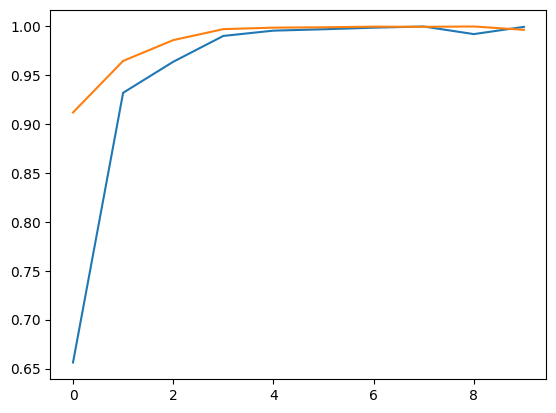

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

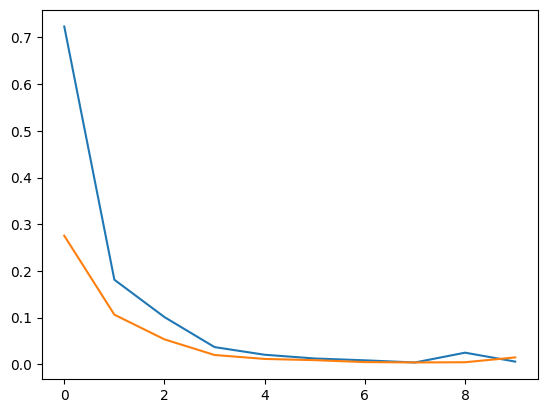

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
def preprocess_image(img_path):
    img_array = cv2.imread(img_path)

    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
img_path = os.path.join('/content/drive/My Drive/GWDATASET/dataset/class_0',m_class_0_file_names[5000])
img_arr = preprocess_image(img_path)
# Make predictions
predictions = model.predict(img_arr)
# predicted_class = np.argmax(predictions)
predictions

1/1 [==============================] - 0s 17ms/step


array([[1., 0., 0.]], dtype=float32)

In [ ]:
# Data paths
test_data_dir = '/content/drive/My Drive/GWDATASET/dataset/'

# Data preprocessing and augmentation
test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 30000 images belonging to 3 classes.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
test_generator.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
# Make predictions on test data
num_samples = test_generator.samples
y_true = test_generator.labels
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Compute precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

118/118 [==============================] - 222s 2s/step
Confusion Matrix:
[[ 9982     0     0]
 [   27 10046     1]
 [    1   137  9806]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9982
           1       0.99      1.00      0.99     10074
           2       1.00      0.99      0.99      9944

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



N Mode Classification Network

In [ ]:
!unzip '/content/drive/My Drive/GWDATASET/n_dataset.zip' -d '/content/drive/My Drive/GWDATASET/'

In [ ]:
import os
len(os.listdir('/content/drive/My Drive/GWDATASET/n_dataset/class_1'))

9762

(128, 128, 3)


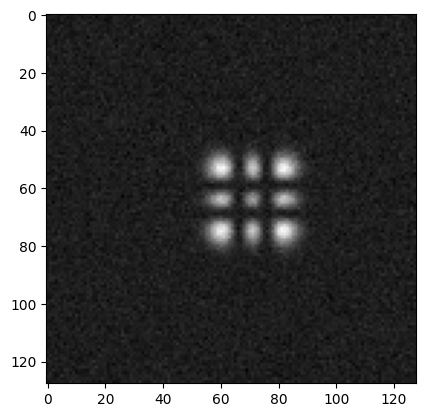

In [ ]:
n_class_0_file_names = os.listdir('/content/drive/My Drive/GWDATASET/n_dataset/class_0')
n_class_1_file_names = os.listdir('/content/drive/My Drive/GWDATASET/n_dataset/class_1')
n_class_2_file_names = os.listdir('/content/drive/My Drive/GWDATASET/n_dataset/class_2')

img_file = cv2.imread(os.path.join('/content/drive/My Drive/GWDATASET/n_dataset/class_2',n_class_2_file_names[1]))
print(img_file.shape)
plt.imshow(img_file)

In [ ]:
# Data paths
n_train_data_dir = '/content/drive/My Drive/GWDATASET/n_dataset/'

# Data preprocessing and augmentation
n_train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [ ]:
n_train_generator = n_train_datagen.flow_from_directory(
    n_train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

n_validation_generator = n_train_datagen.flow_from_directory(
    n_train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 24001 images belonging to 3 classes.
Found 5999 images belonging to 3 classes.


In [5]:
# Create CNN model
n_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [6]:
n_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:


# Compile the model
n_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_n = n_model.fit(
    n_train_generator,
    steps_per_epoch=n_train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=n_validation_generator,
    validation_steps=n_validation_generator.samples // batch_size
)

# # Save the trained model
# model.save('multi_class_image_classification_model.h5')

Epoch 1/10
93/93 [==============================] - 288s 3s/step - loss: 0.6716 - accuracy: 0.6686 - val_loss: 0.2112 - val_accuracy: 0.9297
Epoch 2/10
93/93 [==============================] - 229s 2s/step - loss: 0.1707 - accuracy: 0.9323 - val_loss: 0.0824 - val_accuracy: 0.9713
Epoch 3/10
93/93 [==============================] - 264s 3s/step - loss: 0.0873 - accuracy: 0.9687 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 4/10
93/93 [==============================] - 262s 3s/step - loss: 0.0410 - accuracy: 0.9865 - val_loss: 0.0231 - val_accuracy: 0.9952
Epoch 5/10
93/93 [==============================] - 257s 3s/step - loss: 0.0245 - accuracy: 0.9930 - val_loss: 0.0113 - val_accuracy: 0.9975
Epoch 6/10
93/93 [==============================] - 258s 3s/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0108 - val_accuracy: 0.9975
Epoch 7/10
93/93 [==============================] - 257s 3s/step - loss: 0.0102 - accuracy: 0.9975 - val_loss: 0.0069 - val_accuracy: 0.9976
Epoch 8/10
93

In [ ]:
n_model.save('n_mode_2_class_image_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


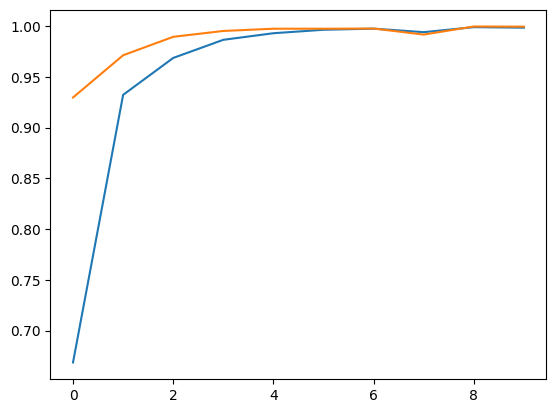

In [ ]:
print(history_n.history.keys())
plt.plot(history_n.history['accuracy'])
plt.plot(history_n.history['val_accuracy'])

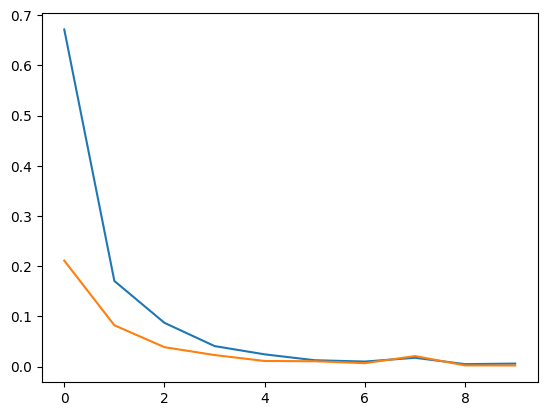

In [ ]:
plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])

In [ ]:
# for file_name in n_class_0_file_names:
#     img_path = os.path.join('/content/drive/My Drive/GWDATASET/n_dataset/class_0',file_name)
#     img_arr = preprocess_image(img_path)
#     print(model.predict(img_arr))

13493_HG_0_0_0.14_p01_n01.png
1/1 [==============================] - 0s 16ms/step
[[1. 0. 0.]]
[[0. 1. 0.]]


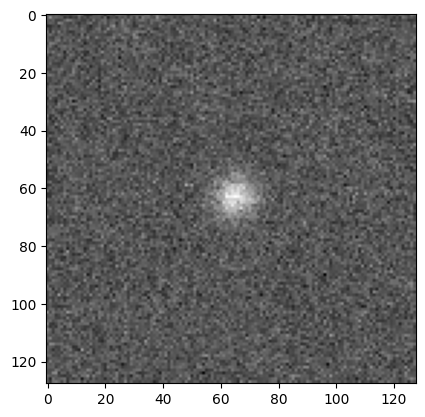

In [ ]:
file_name = n_class_0_file_names[4579]
img_path = os.path.join('/content/drive/My Drive/GWDATASET/n_dataset/class_0',file_name)
print(file_name)
img_arr = preprocess_image(img_path)
img_file = cv2.imread(img_path)
plt.imshow(img_file)
# Make predictions
predictions_m = model.predict(img_arr)
predictions_n = n_model.predict(img_arr)
# predicted_class = np.argmax(predictions)
print(predictions_m)
print(predictions_n)

In [ ]:
#Data paths
n_test_data_dir = '/content/drive/My Drive/GWDATASET/n_dataset/'

# Data preprocessing and augmentation
n_test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [ ]:
n_test_generator = n_test_datagen.flow_from_directory(
    n_test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 30000 images belonging to 3 classes.


In [ ]:
# Make predictions on test data
num_samples = n_test_generator.samples
y_true_n = n_test_generator.labels
y_pred_n = n_model.predict(n_test_generator)
y_pred_classes_n = np.argmax(y_pred, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_n, y_pred_classes_n)

# Compute precision, recall, and F1-score
report = classification_report(y_true_n, y_pred_classes_n)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

118/118 [==============================] - 216s 2s/step
Confusion Matrix:
[[9983  135    0]
 [  26 9735    1]
 [   1  313 9806]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10118
           1       0.96      1.00      0.98      9762
           2       1.00      0.97      0.98     10120

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000

